In [1]:
import warnings
from IPython.display import SVG, display

import gymnasium as gym
import numpy as np
import torch
from pogema import pogema_v0, Hard8x8, GridConfig
from pogema.animation import AnimationMonitor
from stable_baselines3 import DQN

warnings.simplefilter('ignore')

## サンプル1

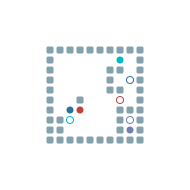

In [2]:
env = pogema_v0(grid_config=Hard8x8())
env = AnimationMonitor(env)

obs, info = env.reset()

while True:
    # Using random policy to make actions
    obs, reward, terminated, truncated, info = env.step([env.action_space.sample() for _ in range(Hard8x8().num_agents)])
    # env.render()
    if all(terminated) or all(truncated):
        break

env.save_animation("render_hard8x8.svg")
display(SVG('render_hard8x8.svg'))

## サンプル2 カスタマイズ

In [3]:
grid_config_small = GridConfig(
    num_agents=4,  # number of agents
    size=8, # size of the grid
    density=0.4,  # obstacle density
    seed=1,  # set to None for random
            # obstacles, agents and targets
            # positions at each reset
    max_episode_steps=128,  # horizon
    obs_radius=3,  # defines field of view
)

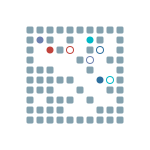

In [4]:
env = pogema_v0(grid_config=grid_config_small)
env = AnimationMonitor(env)

obs, info = env.reset()

terminated = truncated = [False, ...]

while not all(terminated) and not all(truncated):
    # Use random policy to make actions
    obs, reward, terminated, truncated, info = env.step([env.action_space.sample() for _ in range(grid_config_small.num_agents)])

env.save_animation("render_customized.svg")
display(SVG('render_customized.svg'))

### エージェントの数を増やす

In [5]:
grid_config_big = GridConfig(
    num_agents=20,  # number of agents
    size=40, # size of the grid
    density=0.4,  # obstacle density
    seed=1,  # set to None for random
            # obstacles, agents and targets
            # positions at each reset
    max_episode_steps=512,  # horizon
    obs_radius=3,  # defines field of view
)

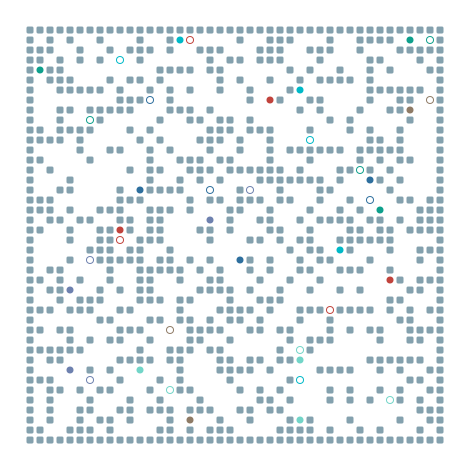

In [6]:
env = pogema_v0(grid_config=grid_config_big)
env = AnimationMonitor(env)

obs, info = env.reset()

terminated = truncated = [False, ...]

while not all(terminated) and not all(truncated):
    # Use random policy to make actions
    obs, reward, terminated, truncated, info = env.step([env.action_space.sample() for _ in range(grid_config_big.num_agents)])

env.save_animation("render_customized.svg")
display(SVG('render_customized.svg'))

### オリジナルマップ
- [Map Rules](https://github.com/KJMAN678/pogema/blob/7f3a6c86f33e4b22191de0ae8a6fe27b05d05471/pogema/grid_config.py#L105-L117)
   - '.' なにもなし
   - '#' 壁
   - ''

In [7]:
grid = """
.....#.....
.....#.....
...........
.....#.....
.....#.....
#.####.....
.....###.##
.....#.....
.....#.....
...........
.....#.....
"""

num_agents = 1
agents_xy = [[2, 2]]
targets_xy = [[2, 4]]

In [8]:
grid_config_original = GridConfig(
    num_agents=num_agents,  # number of agents
    density=0.4,  # obstacle density
    seed=1,  # set to None for random
            # obstacles, agents and targets
            # positions at each reset
    max_episode_steps=128,  # horizon
    obs_radius=3,  # defines field of view
    map = grid,
    agents_xy = agents_xy,
    targets_xy = targets_xy,
)

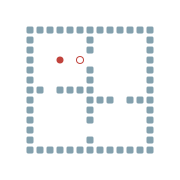

In [9]:
env = pogema_v0(grid_config=grid_config_original)
env = AnimationMonitor(env)

obs, info = env.reset()

terminated = truncated = [False, ...]

while not all(terminated) and not all(truncated):
    # Use random policy to make actions
    obs, reward, terminated, truncated, info = env.step([env.action_space.sample() for _ in range(grid_config_original.num_agents)])

env.save_animation("render_original.svg")
display(SVG('render_original.svg'))

### Stableline3 DQN

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./dqn_pogema_tensorboard/baseline_7


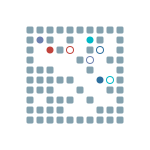

In [10]:
env = gym.make("Pogema-v0", grid_config=grid_config_small)
env = AnimationMonitor(env)

if torch.cuda.is_available():
    total_timesteps=400000
    log_interval=10000    
else:
    total_timesteps=50000
    log_interval=1000

agent = DQN(
    'MlpPolicy',
    env,
    verbose=1,
    tensorboard_log="./dqn_pogema_tensorboard/"
    )

agent.learn(
    total_timesteps=total_timesteps,
    log_interval=log_interval,
    tb_log_name="baseline"
    )

obs, info = env.reset()
terminated = truncated = [False, ...]

while True:
    action, _ = agent.predict(obs)
    obs, reward, terminated, truncated, info = env.step(action)
    
    if terminated or truncated:
        break

env.save_animation("render_dqn.svg")
display(SVG('render_dqn.svg'))